<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Цели исследования:**

1. Защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.
2. Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. 
3. Обосновать корректность его работы.

**Ход исследования**
1. Загрузить и изучить данные.
2. Ответить на вопрос "Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?" и обосновать решение. 
3. Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.
4. Запрограммировать этот алгоритм, применив матричные операции. Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.

## Загрузка данных

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [9]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
except FileNotFoundError:
    print("Файл не найден")
except pd.errors.EmptyDataError:
    print("Файл пустой")
except pd.errors.ParserError:
    print("Ошибка при чтении файла CSV")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [11]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [12]:
# поменяем типа даннных у столбцов "Зарплата" и "Возраст"
data[['Зарплата', 'Возраст']] = data[['Зарплата', 'Возраст']].astype('int')

In [13]:
data.duplicated().sum()

153

In [14]:
# удаляем дубликаты
data.drop_duplicates(inplace=True)

# проверяем дубликаты снова
data.duplicated().sum()

0

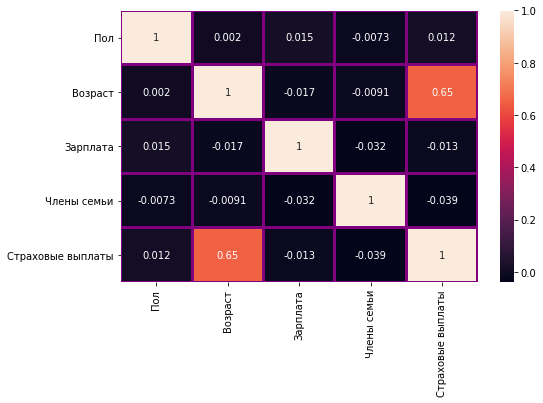

In [15]:
# проверим на мультиколинеарность
plt.rcParams['figure.figsize'] = (8.0, 5.0)
sns.heatmap(data.corr(), linecolor='purple', linewidths=2, annot=True)
plt.show()

**Вывод по разделу загрузки и изучения данных:**

- не пропусков, данные  заполнены корректно;
- типы данных корректны, исправлять нет необходимости;
- аномальных значений, выбросов не было найдено;
- выявлены дубликаты;
- выявленные дубликаты удалены;
- заменили тип данных в столбцах "Возраст" и "Зарплата" на целочисленный;
- выявлена высокая корреляция между зарплатой и возрастом (коэффициент корреляции 0.65);


## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** При умножении признаков на обратимую матрицу качество линейной регрессии не изменится. 

**Обоснование:** Если признаки умножаются на обратимую матрицу $P$, то качество линейной регрессии не должно измениться. Это связано с тем, что умножение признаков на обратимую матрицу не меняет линейные зависимости между признаками и целевым признаком.

Покажем это математически. Пусть $X$ — исходная матрица признаков, $X'$ — матрица признаков после умножения на обратимую матрицу $P$. Тогда формула обучения для линейной регрессии примет вид:
<br>
$$
w' = ((X'P)^TX'P)^{-1}(X'P)^Ty
$$ 
<br>
Раскроем выражение:
<br>
$$
w' = (P^TX'^TX'P)^{-1}P^TX'^Ty
$$  
<br>
Обратимость матрицы $P$ позволяет сократить выражение:
<br>
$$
w' = (X'^TX')^{-1}X'^Ty   
$$
<br>
Используя $X' = XP$, получаем:
<br><br>
$$
w' = ((XP)^TXP)^{-1}(XP)^Ty
$$
<br>
Раскроем скобки:
<br>
$$
w' = (P^TX^TXP)^{-1}P^TX^Ty
$$
<br>
Используя свойство $(AB)^T = B^T A^T$, получаем:
<br>
$$
w' = (P^T(X^TX)P)^{-1}P^TX^Ty
$$
<br>
Так как матрица $(X^TX)$ является симметричной и положительно определенной, а умножение на обратимую матрицу не меняет симметричности и положительной определенности, то матрица $(P^T (X^T X) P)$ также будет симметричной и положительно определенной. 
<br>
<br>
Следовательно, она имеет обратную матрицу:
<br>
<br>
$$
w' = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty   
$$
<br>
Используя свойство $AA^{-1} = I$, где $I$ — единичная матрица, получаем:
<br>
$$
w' = P^{-1}(X^TX)^{-1}X^Ty   
$$
<br>
Таким образом, вектор весов $w'$ после умножения признаков на обратимую матрицу $P$ будет равен $w' = P^{-1} w$. Это означает, что предсказания $a'$ для новых признаков $X'$ можно получить, умножив исходные предсказания $a$ на обратную матрицу $P$

## Алгоритм преобразования

**Алгоритм**


Алгоритм преобразования данных для решения задачи с умножением признаков на обратимую матрицу $P$ может быть следующим:

Вычислить матрицу признаков $X$ и вектор целевого признака $y$.

Сгенерировать обратимую матрицу $P$.

Умножить матрицу признаков $X$ на матрицу $P$:

$X' = XP$.

Обучить модель линейной регрессии на преобразованных признаках $X'$ и векторе целевого признака $y$.

Получить вектор весов $w'$ после обучения модели.

Для получения предсказаний на новых данных с преобразованными признаками $X'$ умножить исходные предсказания $a$ на обратную матрицу $P$:

$a' = aP^{-1}$.

**Обоснование**

Качество линейной регрессии не поменяется при умножении признаков на обратимую матрицу $P$ из-за линейности модели. Предсказания модели линейной регрессии определяются весами $w$ и признаками $X$ следующим образом: $a = Xw$.

После преобразования признаков $X$ в $X'$ (умножение на $P$) получаем новые предсказания $a' = X'w'$. Заменим $X'$ на $XP$:

$a' = XPw'$.

Заметим, что $Pw'$ — новый вектор весов, полученный после обучения модели на преобразованных признаках $X'$. Тогда предсказания $a'$ можно переписать следующим образом:

$a' = XPw' = X(w'P) = Xw = a$.

Таким образом, предсказания на преобразованных данных $a'$ будут равны предсказаниям на исходных данных $a$. Это означает, что качество линейной регрессии не изменится при умножении признаков на обратимую матрицу $P$.

Это значит, что если мы произведём умножение признаков тренировочной и тестовой выборок на одну и ту же обратимую матрицу, то результатом предсказания будет произведение нашей изменённой таблицы с признаками на вектор, который был получен из той же таблицы с изменёнными данными увеличенную на ту же величину, что и признаки тренировочных данных. Проверим работу данного алгоритма в следующей главе.

## Проверка алгоритма

Для проверки алгоримта нам понадобится подготовить:
- целевой признак;
- исходные обучающие признаки;
- обучающие признаки после умножения;
- матрицу для умножения.

Далее обучим линейную регрессию на исходных данных. После умножим признаки на рандомную матрицу и проведем обучение линейной регрессии на новых данных.

In [16]:
# выделим признаки и целевой признак
features = data.drop('Страховые выплаты',axis=1)
target = data['Страховые выплаты']

In [17]:
# cоздадим обучающие и тестовые выборки 
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=1234)

In [18]:
# модель линейной регрессии с исходными признаками без преобразования
model = LinearRegression()
model.fit(features_train, target_train)
r2 = r2_score(target_test, model.predict(features_test))
print(f'Метрика R2 для признаков в исходном состоянии: {r2}')

Метрика R2 для признаков в исходном состоянии: 0.4214584788072574


In [19]:
# модель с отмасштабированными признаками без преобразования
regressor = LinearRegression()
scaller = StandardScaler()
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", regressor)])
pipeline.fit(features_train, target_train)
r2_scaled = r2_score(target_test, pipeline.predict(features_test))
print(f'Метрика R2 с отмасштабированными признаками без преобразования: {r2_scaled}')

Метрика R2 с отмасштабированными признаками без преобразования: 0.4214584788072575


In [20]:
# исследуем качество модели с преобразованием, создадим рандомную матрицу
n = features.shape[1]
matrix = np.random.randint(1,10, (n,n))
# защищенные признаки 
matrix_features = features
matrix_features = matrix_features @ matrix
np.linalg.inv(matrix)

array([[-0.06   ,  0.06   , -0.01   ,  0.12   ],
       [-0.3625 ,  0.1125 ,  0.29375,  0.1    ],
       [ 0.1525 ,  0.0975 , -0.07875, -0.18   ],
       [ 0.23   , -0.23   , -0.045  ,  0.04   ]])

In [21]:
display(features.head())
display(matrix_features.head())
matrix

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


,0,1,2,3
0,99501,297686,297854,297650
1,76330,228093,228277,228049
2,42203,126058,126174,126029
3,83563,250244,250328,250227
4,52402,156659,156775,156634


array([[6, 3, 7, 6],
       [7, 2, 6, 1],
       [2, 6, 6, 6],
       [8, 1, 1, 3]])

In [22]:
# разобьем данные на тестовую и тренировочную выборки, проверим качество
features_train, features_test, target_train, target_test = train_test_split(
    matrix_features, target, test_size=0.25, random_state=1234)

In [23]:
# модель с исходными признаками без преобразования
model = LinearRegression()
model.fit(features_train, target_train)
r2_data = r2_score(target_test, model.predict(features_test))
print("R2 =", r2_data)

R2 = 0.42145847880723075


In [24]:
# модель с отмасштабированными признаками без преобразования
regressor = LinearRegression()
scaller = StandardScaler()
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", regressor)])
pipeline.fit(features_train, target_train)
r2_data_scaled = r2_score(target_test, pipeline.predict(features_test))
print("R2 =", r2_data_scaled)

R2 = 0.4214584788072727


In [25]:
# соберем все результаты наглядно рядом
result = pd.DataFrame(data= [r2,
                      r2_scaled,
                      r2_data,
                      r2_data_scaled], 
                      columns=['r2'], 
                      index=['Качество исходных данных',
                            'Качество исходных данных c смасштабированных',
                            'Качество на преобразованных признаках',
                            'Качество на преобразованных признаках с масштабом',])
result

,r2
Качество исходных данных,0.421458
Качество исходных данных c смасштабированных,0.421458
Качество на преобразованных признаках,0.421458
Качество на преобразованных признаках с масштабом,0.421458


**Вывод по проверке алгоритма:**
Качество линейной регресии не изменилось от использования исxодной матрицы и её же, умноженной на обратимую. Использовали метрику R2.

**Вывод**

1) Загрузили и проанализировали данные (корректировки и больших изменений не затребовалась)

2) Разработали алгоритм преобразования данных. Алгоритм обоснвоан и проверен.

3) Качество линейной регресии не изменилось от использования исxодной матрицы и исходной матрицы, умноженной на обратимую.